In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Utility Objects

In [2]:
ACTUAL_COLOR = "navy"
PREDICTED_COLOR = "firebrick"

def plot_actual_predicted(X, y_actual, y_pred):
    plt.figure(figsize=(15, 6))
    plt.scatter(
        X, y_actual, marker="o", label="Actual Curve", color=ACTUAL_COLOR, s=30
    )
    plt.plot(X, y_pred, "g-", lw=2.5, label="Fitted Curve", color=PREDICTED_COLOR)
    plt.title("Plot of Actual Points vs. Fitted Curve", fontsize=20)
    plt.xlabel("x - values", fontsize=15)
    plt.ylabel("y - values", fontsize=15)
    plt.legend(loc="upper left")
    plt.show()

# Load Data

In [3]:
data = np.loadtxt(open("linear_regression_test.csv", "rb"), delimiter=",")
X = data[:, 0]
y = data[:, 1]

# Visualization

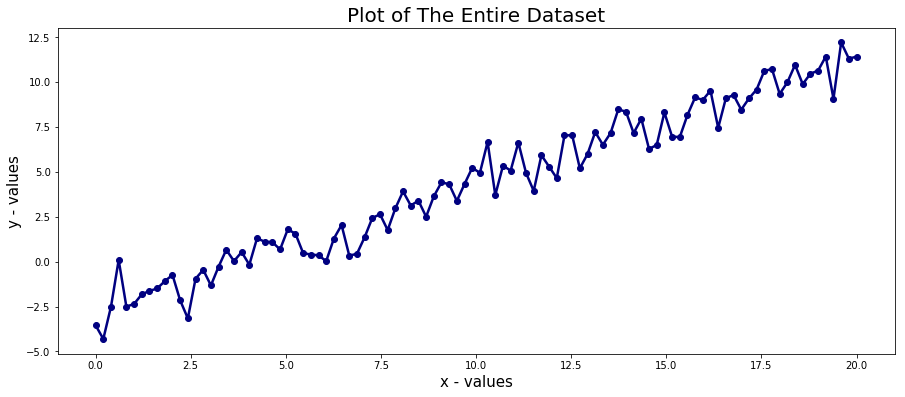

In [4]:
plt.figure(figsize=(15, 6))
plt.plot(X, y, lw=2.5, marker='o', color=ACTUAL_COLOR)
plt.title("Plot of The Entire Dataset", fontsize=20)
plt.xlabel("x - values", fontsize=15)
plt.ylabel("y - values", fontsize=15)
plt.show()

# Ordinary Linear Regression

Let the linear regression function be:

$$
y_i=\beta_0+\beta_1x_{i} \ \ -------- \ (1)
$$

The estimated parameters are the intercept and slope (beta 0 & 1 respectively). <br>
A unit vector (vector of all 1) should be stacked along the X values in order to compute beta 0 along side beta 1.

$$
\mathbf {X}=\begin{bmatrix}
1 & X_{1} \\
1 & X_{2} \\
\vdots & \vdots \\
1 & X_{n}
\end{bmatrix} ,
\qquad \boldsymbol \beta = \begin{bmatrix}
\beta_0 \\ \beta_1 \end{bmatrix} ,
\qquad \mathbf y = \begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{bmatrix} 
\ \ -------- \ (2)
$$

In [5]:
X_stack = np.stack([np.ones(X.shape[0]), X], axis=-1)

The estimated parameters are:

$$
\hat{\boldsymbol{\beta}}= (\mathbf X^{\rm T} \mathbf X )^{-1} \mathbf X^{\rm T} \mathbf y \ \ -------- \ (3)
$$

In [6]:
def estimate_beta(X_stack, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X_stack.T, X_stack)), X_stack.T), y)

Having estimated the weights (betas), y can be predicted by using the equation below:

$$
\hat{\boldsymbol{y}} = \boldsymbol X \hat{\boldsymbol{\beta}} \ =\  \hat{\beta_0}+ \hat{\beta_1}x_{i}\ \ -------- \ (4)
$$

In [7]:
def estimate_y(X_stack, betas_hat):
    return np.dot(X_stack, betas_hat)

# Linear Regression model with Gradient Descent

Gradient descent is an optimization technique for finding the minima (preferably the local minima) of a function (called cost function). While gradient ascent is the opposite. 

There are different types of gradient descent, the most common are: <br> 
- batch gradient descent
- stochastic gradient descent
- mini-batch gradient descent

In this case, let the cost function be MSE, hence I need to find the minimum MSE:

$$
Mean \ Square \ Error \ (MSE) = {1 \over N} \sum_i (y_i-\hat{y})^2 \ \ -------- \ (5)
$$

In [8]:
def mse(y, y_hat):
    return round(np.sum((y - y_hat)**2) / len(y))

Substituting equation (4) into (6):

$$
MSE = {1 \over N} \sum_i (y_i-\ (\hat{\beta_0}+ \hat{\beta_1}x_{i}))^2 \ \ -------- \ (6)
$$

Hence, I will derivation the 1st-iterative of MSE with respect to its parameters (beta 0 & 1).

$$
\frac{\partial}{\partial \hat{\beta_0}} \ \ MSE \ \ = {2 \over N} \sum_i - \ (y_i-\ (\hat{\beta_0}+ \hat{\beta_1}x_{i})) \ \ -------- \ (7a)
$$

$$
\frac{\partial}{\partial \hat{\beta_0}} \ \ MSE \ \ 
= {-2 \over N} \sum_i (y_i-\ \hat{y_i}) 
\ \ -------- \ (7b) \ \ \ [using \ equ \ (4)]
$$

In [9]:
def gradient_beta_0(y, y_hat):
    return -2/len(y) * np.sum(y - y_hat)

$$
\frac{\partial}{\partial \hat{\beta_1}} \ \ MSE \ \ = {2 \over N} \sum_i - x_{i} \ (y_i-\ (\hat{\beta_0}+ \hat{\beta_1}x_{i})) \ \ -------- \ (8a)
$$

$$
\frac{\partial}{\partial \hat{\beta_1}} \ \ MSE \ \ 
= {-2 \over N} \sum_i x_{i} \ (y_i-\ \hat{y_i})
\ \ -------- \ (8b)  \ \ \ [using \ equ \ (4)]
$$

In [10]:
def gradient_beta_1(X, y, y_hat):
    return -2/len(y) * np.sum(X * (y - y_hat))

The objective is to find the best set of betas that will yield the minimal MSE. <br>
The initial betas can be set to a very small number:

$$
\hat{\beta_0} = 0.01  \ \ -------- \ (9)
$$

$$
\hat{\beta_1} = 0.01  \ \ -------- \ (10)
$$

Learning rate is a technique used to control the steps taken while descending. A high learning rate implies that it covers more in each step, which can be detrimental to achieving the local minima. Conversely, a low learning rate means declining down the slope gradually.

Set the learning rate to:

$$
{l_{rate}} = 0.005   \ \ -------- \ (11)
$$

At each step of the gradient descent, we are required to do the following:
- use the estimated betas to predict y
- compute the cost function (MSE)
- update the betas
- repeat until the cost function is almost indifferece
    - or the total number of steps taken down the slope (called epoch). We will take this approach.

In [11]:
beta_0 = 0.01
beta_1 = 0.01
l_rate = 0.005
epoch = 2500
costs = [None] * epoch

for i in range(epoch):
    y_hat = estimate_y(X_stack, np.array([beta_0, beta_1]))
    costs[i] = mse(y, y_hat)
    beta_0 -= l_rate * gradient_beta_0(y, y_hat)
    beta_1 -= l_rate * gradient_beta_1(X, y, y_hat)

In [12]:
print(f'The optimal betas are {round(beta_0, 5)} and {round(beta_1,5)} respectively.')

The optimal betas are -2.83248 and 0.7128 respectively.


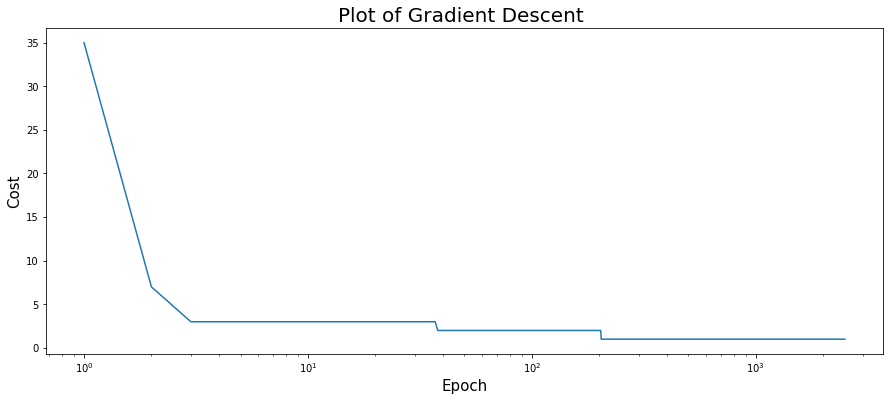

In [13]:
plt.figure(figsize=(15, 6))
plt.semilogx(list(range(1,  epoch+1)), costs)
plt.title('Plot of Gradient Descent ', fontsize=20)
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Cost',fontsize=15)
plt.show()

# Estimating y with the optimal betas

In [14]:
y_pred_desc = estimate_y(X_stack, np.array([beta_0, beta_1]))

# Visualize the fitted model against the data

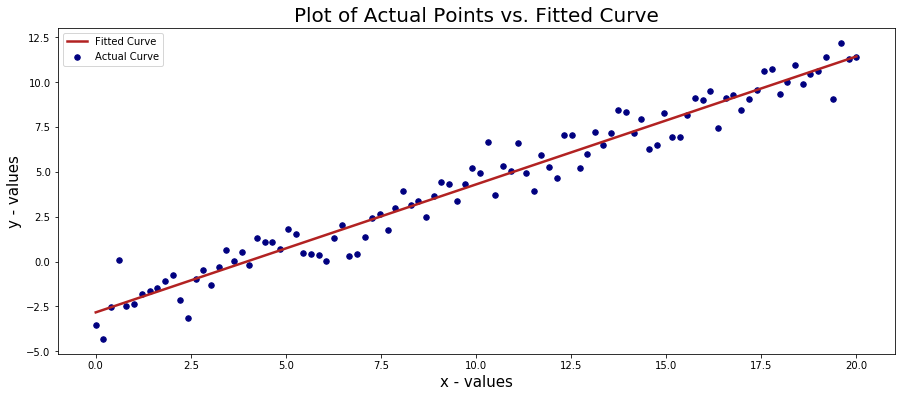

In [15]:
plot_actual_predicted(X, y, y_pred_desc)

# R-squared value

$$
R^2 = 1 - {\sum_i (y_i-\hat{y})^2 \over \sum_i (y_i-\bar{y})^2} \ \ -------- \ (12)
$$

In [16]:
def r_squared(y, y_hat):
    numerator = np.sum((y - y_hat)**2)
    denominator = np.sum((y - np.average(y))**2)
    return round(1 - numerator / denominator, 6)

In [17]:
print('The R-squared is {}'.format(r_squared(y, y_pred_desc)))

The R-squared is 0.958823
